In [15]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from numpy import random
from mpmath import mp
import time 
import copy 
from tqdm import tqdm 
import csv

In [16]:
def calculate_v_values(Q_values_action1, Q_values_action2):
    V_values = np.zeros((2,10))
    for i in range(2):
        for j in range(10):
            V_values[i][j] = max(Q_values_action1[i][j],Q_values_action2[i][j])  # Use keepdims=True to maintain the 2D shape
    return V_values

V_true = np.array([[ 0,         0,          0,          0,          0,          0,
   0,          0,          0,          0        ],
   [5.20609088, 10.98257709, 16.18277733, 21.10806607, 26.14558744, 30.49934127,
  36.64971727, 41.42251637, 45.25001465, 50.77376517]])
# V_true = [9, 8.15241315, 7.47595723, 6.90163656, 6.49113047]

def bellman_relative_error(V_approx, V_true):
    nonzero_indices = V_true != 0
    if np.any(nonzero_indices):
        #relative_errors = np.abs((V_approx[nonzero_indices] - V_true[nonzero_indices]) / V_true[nonzero_indices])
        relative_errors = np.abs((V_approx[nonzero_indices] - V_true[nonzero_indices]))
        return np.mean(relative_errors)
    else:
        return np.nan

In [24]:
class envir():
    def __init__(self):
        self.phi = 9
        self.p1=[]
        for i in range(10):
            self.p1.append(0.05*(i+1))
    def step(self,s,task):
            next_state = copy.copy(s)
            if s[task] == 0:
                next_state[task] = 0
            else:
                #print(s,task,get_prob(s[task],self.p1[task],self.lamda))
                next_state[task] = random.choice([0,s[task]],1,p=[self.p1[task],1-self.p1[task]])
            if s[task]!=0 and next_state[task] == 0:
                reward = 1
            elif s[task]==0:
                reward = -10000
            else:
                reward = 0
            return next_state,reward
            

In [28]:
class Agent():
    def __init__(self,alpha,gamma):
        self.Q_values = np.zeros((2,2,10))
        self.alpha = alpha
        #self.c= c
        self.gamma = gamma
    def activate_task_eps_greedy(self,s,M,epsilon):
        r = random.random()
        if r < epsilon:
            action = np.random.choice(10)
            #print(action)
        else:
            gre = [0]*len(s)
            for i in range(len(s)):
                gre[i] = M[s[i]][i]
            action = np.argmax(gre)
        return action
    
    def check_best_action(self,state):
        ind = 0
        for i,_ in reversed(list(enumerate(state))):
            if state[i] == 1:
                ind = i
                break
        return ind


  0%|          | 0/2500 [00:00<?, ?it/s]C:\Users\Harshit\AppData\Local\Temp\ipykernel_25188\1283357597.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_state[task] = random.choice([0,s[task]],1,p=[self.p1[task],1-self.p1[task]])
100%|██████████| 2500/2500 [13:28<00:00,  3.09it/s]


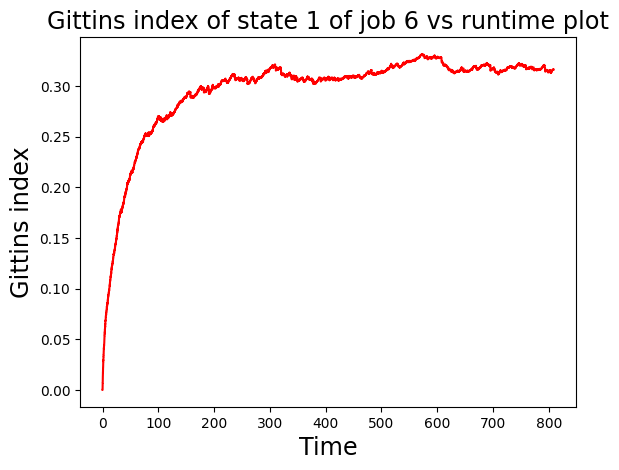

[[-4.53246969e+05 -9.41148088e+05 -9.78354494e+05 -9.86273980e+05
  -9.91047411e+05 -9.92828266e+05 -9.94274748e+05 -9.95579483e+05
  -9.96115644e+05 -9.96482537e+05]
 [ 5.64499624e+00  1.14710147e+01  1.56229772e+01  2.09259196e+01
   2.64595057e+01  3.16152088e+01  3.68329142e+01  4.02046946e+01
   4.62957144e+01  5.01205677e+01]]


In [34]:
Q_values = np.zeros((2,2,10))

def select_task(s,M):
        k = []
        for i in range(10):
            k.append(M[s[i]][i])
        max_index = np.argmax(k)  # Get the index of the maximum value
        return max_index

class game():
    start_time = time.time()
    M = np.zeros((2,10))
    '''for i in range(100):
        for j in range(9):
            M[i][j] = 0'''
    c0 = 0
    hist01 = []
    ti = []
    c1 = 0
    m = 0
    m1 = 0
    ct = 0
    F = np.zeros((2,10))
    env = envir()
    hist = []
    hist2 =[]
    hist3 =[]
    hist4 =[]
    hist5 =[]
    hist6 = []
    trials = 2500
    tries = 0
    cumm_rew = []
    BRE = []
    plt_wrong_actions = []
    cumm_wrong_steps = []
    agent = Agent(alpha = 0.1,gamma = 0.99)
    eps = 1
    for trial_no in tqdm(range(trials)):
        s = np.array([1,1,1,1,1,1,1,1,1,1])
        #Calculating Q values over state space for a given arm for the given M vector through Q learning
        #for step in range(2):
        #print(tries,trial_no)
        tries = 0 
        episode_rew = 0
        eps = eps*0.9985
        #print(f"Trial no: {trial_no}")
        while (s[0]!=0 or s[1]!=0 or s[2]!=0 or s[3]!=0 or s[4]!=0 or s[5]!=0 or s[6]!=0 or s[7]!=0 or s[8]!=0 or s[9]!=0):
            if len(cumm_rew)==0:
                cumm_rew.append(episode_rew)
            else:
                cumm_rew.append(cumm_rew[-1]+episode_rew)
            #print(s)
            tries += 1 
            task_eps = agent.activate_task_eps_greedy(s,M,eps)
            task = task_eps
            task_opt = agent.check_best_action(s)
            current_time = time.time()-start_time
            next_state, R = env.step(s,task)
            #print(next_state)
            episode_rew += R
            if task_eps != task_opt:
                cumm_wrong_steps.append(1)
            else:
                cumm_wrong_steps.append(0)
            plt_wrong_actions.append(np.mean(cumm_wrong_steps)*100)
            Q0 = np.zeros((2,10))
            for i in range(2):
                for j in range(10):
                    Q0[i][j] = agent.Q_values[i][i][j]
            V_values = calculate_v_values(Q0,M)
            BRE.append(bellman_relative_error(V_values,V_true))

            #print(task)
            #print(next_state)
            #print('r',R)
            for k in range(2):
                Q_values[s[task]][k][task] += agent.alpha*(R+agent.gamma*(max(M[k][task],copy.copy(Q_values[next_state[task]][k][task])))-Q_values[s[task]][k][task])    
            if((trial_no%50)==0):
                agent.alpha = agent.alpha-0.000002
            s= copy.copy(next_state) 

          #Algorithm for stochastic approximation

          #Calculating F
            for i in range(2):
                F[i][task] = -M[i][task]+Q_values[i][i][task]
                #print('F',F[i][task])
                #print('m',M[i][task])
                #print('q',Q_values[i][i][task])
    
          #Print values
            #print("Iteration no",t)
            #print("F",F)

          #Update M
            for i in range(2):
                M[i][task] = M[i][task] + 0.4*(F[i][task])       
            hist01.append(0.01*M[1][5])
            ti.append(current_time)

          #Stopping criteria
          #For M[i]
            '''if(t>=10):
                if(F[0]==0 and (histV0[len(histV0)-1]-histV0[len(histV0)-5]<0.1)):
                    ct=1;
                    m=M[0]   
          #For algorithm
            print(" ")
            histm0.append(M[0])
            histm1.append(M[1])
            if ((np.linalg.norm(F)<.9) or t>=9000) and (t>=2 and np.linalg.norm(V-Vold)<0.1):
                print("Gittin's index for state 0 is",0.2*min(m,(M[0])))
                print("Gittin's index for state 1 is",0.2*(M[1]))
                break'''
            '''hist.append(Q_values[1][1][1])
            hist2.append(Q_values[2][2][1])
            hist3.append(Q_values[3][3][1])
            hist4.append(M[1][1])
            hist5.append(M[2][1])
            hist6.append(M[3][1])'''
    for i in range(2):
        for j in range(10):
            Q0[i][j] = agent.Q_values[i][i][j]
    V_values = calculate_v_values(Q0,M)
    plt.title('Gittins index of state 1 of job 6 vs runtime plot',fontsize='xx-large')
    plt.xlabel('Time', fontsize = 'xx-large')
    plt.ylabel('Gittins index',fontsize = 'xx-large')
    plt.plot(ti,hist01,'-',c='red')
    '''plt.plot(ti,hist2,'-',c='cyan')
    plt.plot(ti,hist3,'-',c='green')
    plt.plot(ti,hist4,'-',c='yellow')
    plt.plot(ti,hist5,'-',c='black')
    plt.plot(ti,hist6,'-',c='grey')'''
    plt.show()
    #print(M[0][:])
    print(M)
    filename = 'C:\\Intern\\percent_wrong_QGI_constHR.csv'

    # Writing to CSV file
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['percent_wrong'])  # Writing the header
        for value in plt_wrong_actions:
            writer.writerow([value])  # Writing each value in a new row

    filename = 'C:\\Intern\\BRE_QGI_constHR.csv'

    # Writing to CSV file
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['BRE'])  # Writing the header
        for value in BRE:
            writer.writerow([value])  # Writing each value in a new row

    filename = 'C:\\Intern\\cumm_rew_QGI_constHR.csv'
    
    # Writing to CSV file
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['cumm_rew'])  # Writing the header
        for value in cumm_rew:
            writer.writerow([value])  # Writing each value in a new row     